## Evaluation of Group Recommendation Algorithms with Aggregation Strategy: "Average"

### Loading recommendation output and test data

In [21]:
## Load Statistics
from lenskit import topn
from lenskit.metrics.topn import ndcg
import pandas as pd
from matplotlib import pyplot as plt
from lenskit.metrics.predict import rmse
from IPython.display import set_matplotlib_formats


# Load results files: n = 100
recs100 = pd.read_csv('output/AVG-100/recs.csv')
test_data100 = pd.read_csv('output/AVG-100/testdata.csv')
preds100 = pd.read_csv('output/AVG-100/preds.csv')

# Load results files: n = 10
recs10 = pd.read_csv('output/AVG-10/recs.csv')
test_data10 = pd.read_csv('output/AVG-10/testdata.csv')
preds10 = pd.read_csv('output/AVG-10/preds.csv')

# Load results files: n = 5
recs5 = pd.read_csv('output/AVG-5/recs.csv')
test_data5 = pd.read_csv('output/AVG-5/testdata.csv')
preds5 = pd.read_csv('output/AVG-5/preds.csv')

# Load results files: n = 3
recs3 = pd.read_csv('output/AVG-3/recs.csv')
test_data3 = pd.read_csv('output/AVG-3/testdata.csv')
preds3 = pd.read_csv('output/AVG-3/preds.csv')

### 1. Recommendation Metrics: Normalized Discounted Cummulative Gain: nDCG

In [29]:
rla = topn.RecListAnalysis()
rla.add_metric(topn.ndcg)
rla.add_metric(topn.precision)
rla.add_metric(topn.recall)

results100 = rla.compute(recs100, test_data100)
ndcg100 = results100.groupby('Algorithm').ndcg.mean()
precision100 = results100.groupby('Algorithm').precision.mean()
recall100 = results100.groupby('Algorithm').recall.mean()

results10 = rla.compute(recs10, test_data10)
ndcg10 = results10.groupby('Algorithm').ndcg.mean()
precision10 = results10.groupby('Algorithm').precision.mean()
recall10 = results10.groupby('Algorithm').recall.mean()

results5 = rla.compute(recs5, test_data5)
ndcg5 = results5.groupby('Algorithm').ndcg.mean()
precision5 = results5.groupby('Algorithm').precision.mean()
recall5 = results5.groupby('Algorithm').recall.mean()

results3 = rla.compute(recs3, test_data3)
ndcg3 = results3.groupby('Algorithm').ndcg.mean()
precision3 = results3.groupby('Algorithm').precision.mean()
recall3 = results3.groupby('Algorithm').recall.mean()

print(ndcg3)

Algorithm
domex     0.051844
hierch    0.051844
ii        0.031482
rel       0.048915
socap     0.048915
socsim    0.051844
soxsim    0.048915
symp      0.051844
trst      0.051844
Name: ndcg, dtype: float64


In [102]:

df = pd.DataFrame({'Algorithm':ndcg100.index, 'ndcg':ndcg100.values, 'n':100})
ndcg_df = pd.concat([df, pd.DataFrame({'Algorithm':ndcg10.index, 'ndcg':ndcg10.values, 'n':10}), pd.DataFrame({'Algorithm':ndcg5.index, 'ndcg':ndcg5.values, 'n':5}), pd.DataFrame({'Algorithm':ndcg3.index, 'ndcg':ndcg3.values, 'n':3})], ignore_index=True)
print(ndcg_df.sort_values(by=['n', 'ndcg'], ascending=False))



Algorithm      ndcg    n
1     hierch  0.102196  100
8       trst  0.101998  100
7       symp  0.101828  100
3        rel  0.101780  100
4      socap  0.101370  100
0      domex  0.100196  100
6     soxsim  0.100110  100
5     socsim  0.099833  100
2         ii  0.072343  100
16      symp  0.070697   10
17      trst  0.070565   10
9      domex  0.070383   10
10    hierch  0.070167   10
14    socsim  0.069743   10
15    soxsim  0.069641   10
12       rel  0.068297   10
13     socap  0.067636   10
11        ii  0.033488   10
21       rel  0.072881    5
24    soxsim  0.072881    5
25      symp  0.071842    5
26      trst  0.071842    5
19    hierch  0.071292    5
18     domex  0.068913    5
22     socap  0.068913    5
23    socsim  0.068913    5
20        ii  0.034691    5
27     domex  0.051844    3
28    hierch  0.051844    3
32    socsim  0.051844    3
34      symp  0.051844    3
35      trst  0.051844    3
30       rel  0.048915    3
31     socap  0.048915    3
33    soxsim  0.048915 

/Users/safey.halim/.local/share/virtualenvs/gurator-eval-3p0ORahF/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


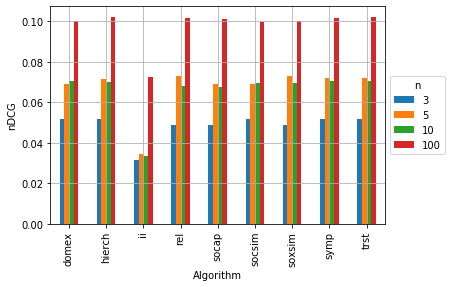

In [99]:
ndcg_df.pivot("Algorithm", "n", "ndcg").plot(kind='bar')

ax = plt.subplot(111)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='n')
ax.grid(zorder=0)
plt.ylabel('nDCG')
plt.show()

## Precision at n

In [103]:
df = pd.DataFrame({'Algorithm':precision100.index, 'precision':precision100.values, 'n':100})
precision_df = pd.concat([df, pd.DataFrame({'Algorithm':precision10.index, 'precision':precision10.values, 'n':10}), pd.DataFrame({'Algorithm':precision5.index, 'precision':precision5.values, 'n':5}), pd.DataFrame({'Algorithm':precision3.index, 'precision':precision3.values, 'n':3})], ignore_index=True)
print(precision_df.sort_values(by=['n', 'precision'], ascending=False))

Algorithm  precision    n
1     hierch   0.003095  100
3        rel   0.003095  100
4      socap   0.003095  100
5     socsim   0.003095  100
6     soxsim   0.003095  100
7       symp   0.003095  100
8       trst   0.003095  100
0      domex   0.003016  100
2         ii   0.002222  100
15    soxsim   0.015079   10
9      domex   0.014286   10
10    hierch   0.014286   10
12       rel   0.014286   10
13     socap   0.014286   10
14    socsim   0.014286   10
16      symp   0.014286   10
17      trst   0.014286   10
11        ii   0.006349   10
21       rel   0.019048    5
18     domex   0.017460    5
19    hierch   0.017460    5
22     socap   0.017460    5
23    socsim   0.017460    5
24    soxsim   0.017460    5
25      symp   0.017460    5
26      trst   0.017460    5
20        ii   0.009524    5
27     domex   0.018519    3
28    hierch   0.018519    3
30       rel   0.018519    3
31     socap   0.018519    3
32    socsim   0.018519    3
33    soxsim   0.018519    3
34      symp   0.

/Users/safey.halim/.local/share/virtualenvs/gurator-eval-3p0ORahF/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


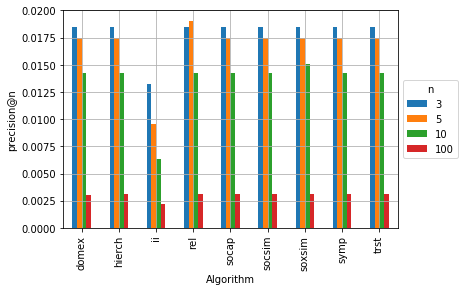

In [104]:
precision_df.pivot("Algorithm", "n", "precision").plot(kind='bar')

ax = plt.subplot(111)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='n')
ax.grid(zorder=0)
plt.ylabel('precision@n')
plt.show()

## Recall at n

In [105]:
df = pd.DataFrame({'Algorithm':recall100.index, 'recall':recall100.values, 'n':100})
recall_df = pd.concat([df, pd.DataFrame({'Algorithm':recall10.index, 'recall':recall10.values, 'n':10}), pd.DataFrame({'Algorithm':recall5.index, 'recall':recall5.values, 'n':5}), pd.DataFrame({'Algorithm':recall3.index, 'recall':recall3.values, 'n':3})], ignore_index=True)
print(recall_df.sort_values(by=['n', 'recall'], ascending=False))

Algorithm    recall    n
1     hierch  0.301587  100
3        rel  0.301587  100
4      socap  0.301587  100
5     socsim  0.301587  100
6     soxsim  0.301587  100
7       symp  0.301587  100
8       trst  0.301587  100
0      domex  0.293651  100
2         ii  0.218254  100
15    soxsim  0.142857   10
9      domex  0.134921   10
10    hierch  0.134921   10
12       rel  0.134921   10
13     socap  0.134921   10
14    socsim  0.134921   10
16      symp  0.134921   10
17      trst  0.134921   10
11        ii  0.063492   10
21       rel  0.091270    5
18     domex  0.083333    5
19    hierch  0.083333    5
22     socap  0.083333    5
23    socsim  0.083333    5
24    soxsim  0.083333    5
25      symp  0.083333    5
26      trst  0.083333    5
20        ii  0.043651    5
27     domex  0.051587    3
28    hierch  0.051587    3
30       rel  0.051587    3
31     socap  0.051587    3
32    socsim  0.051587    3
33    soxsim  0.051587    3
34      symp  0.051587    3
35      trst  0.051587 

/Users/safey.halim/.local/share/virtualenvs/gurator-eval-3p0ORahF/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


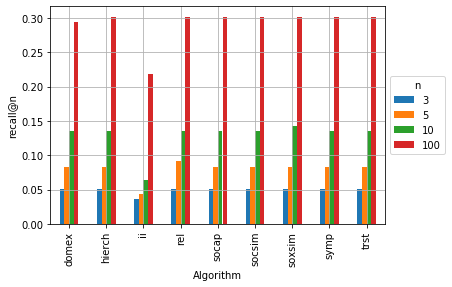

In [106]:
recall_df.pivot("Algorithm", "n", "recall").plot(kind='bar')

ax = plt.subplot(111)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='n')
ax.grid(zorder=0)
plt.ylabel('recall@n')
plt.show()

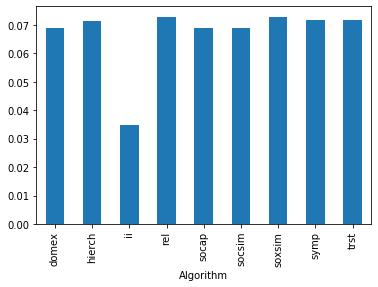

In [24]:
#set_matplotlib_formats('svg')
results.groupby('Algorithm').ndcg.mean().plot.bar()

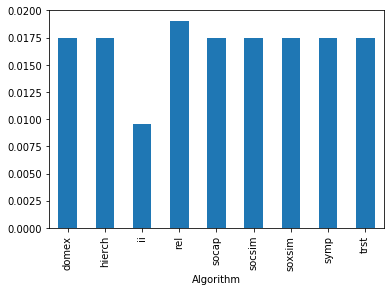

In [25]:
results.groupby('Algorithm').precision.mean().plot.bar()

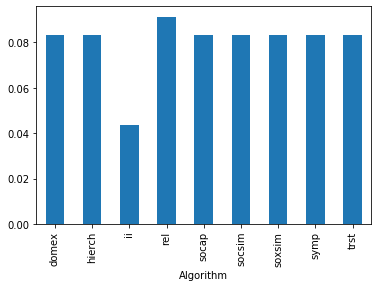

In [26]:
results.groupby('Algorithm').recall.mean().plot.bar()

### 2. Prediction Metrics: RMSE

Algorithm
domex     0.414531
hierch    0.415621
ii        0.324450
rel       0.415100
socap     0.415565
socsim    0.416789
soxsim    0.416147
symp      0.415507
trst      0.415817
dtype: float64
user
1      0.336733
2      0.520981
3      0.842816
4      0.558914
5      0.628221
         ...   
134    0.348691
135    0.518606
136    0.224161
137    0.330282
138    0.271293
Length: 127, dtype: float64


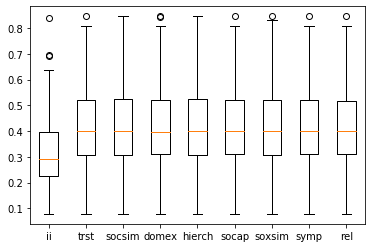

"\nprint('Item Item Knn: max rmse per user = ' + str(user_rmse_ii.max()) + ', min rmse per user = ' + str(user_rmse_ii.min()) + ', average rmse per user = ' + str(user_rmse_ii.mean()))\nprint('Trust: max rmse per user = ' + str(user_rmse_trst.max()) + ', min rmse per user = ' + str(user_rmse_trst.min()) + ', average rmse per user = ' + str(user_rmse_trst.mean()))\nprint('Social Similarity: max rmse per user = ' + str(user_rmse_socsim.max()) + ', min rmse per user = ' + str(user_rmse_socsim.min()) + ', average rmse per user = ' + str(user_rmse_socsim.mean()))\nprint('Domain Expertise: max rmse per user = ' + str(user_rmse_domex.max()) + ', min rmse per user = ' + str(user_rmse_domex.min()) + ', average rmse per user = ' + str(user_rmse_domex.mean()))\nprint('Social Hierarchy: max rmse per user = ' + str(user_rmse_hierch.max()) + ', min rmse per user = ' + str(user_rmse_hierch.min()) + ', average rmse per user = ' + str(user_rmse_hierch.mean()))\nprint('Social Capital: max rmse per user 

In [27]:
user_rmse = (preds.groupby(['Algorithm', 'user']).apply(lambda df: rmse(df.prediction, df.rating))).dropna()
print(user_rmse.groupby('Algorithm').mean())

print(user_rmse['domex'])

plt.boxplot((user_rmse['ii'], user_rmse['trst'], user_rmse['socsim'], user_rmse['domex'], user_rmse['hierch'], user_rmse['socap'], user_rmse['soxsim'], user_rmse['symp'], user_rmse['rel']), labels= ['ii', 'trst', 'socsim', 'domex', 'hierch', 'socap', 'soxsim', 'symp', 'rel'])
plt.show()


"""
print('Item Item Knn: max rmse per user = ' + str(user_rmse_ii.max()) + ', min rmse per user = ' + str(user_rmse_ii.min()) + ', average rmse per user = ' + str(user_rmse_ii.mean()))
print('Trust: max rmse per user = ' + str(user_rmse_trst.max()) + ', min rmse per user = ' + str(user_rmse_trst.min()) + ', average rmse per user = ' + str(user_rmse_trst.mean()))
print('Social Similarity: max rmse per user = ' + str(user_rmse_socsim.max()) + ', min rmse per user = ' + str(user_rmse_socsim.min()) + ', average rmse per user = ' + str(user_rmse_socsim.mean()))
print('Domain Expertise: max rmse per user = ' + str(user_rmse_domex.max()) + ', min rmse per user = ' + str(user_rmse_domex.min()) + ', average rmse per user = ' + str(user_rmse_domex.mean()))
print('Social Hierarchy: max rmse per user = ' + str(user_rmse_hierch.max()) + ', min rmse per user = ' + str(user_rmse_hierch.min()) + ', average rmse per user = ' + str(user_rmse_hierch.mean()))
print('Social Capital: max rmse per user = ' + str(user_rmse_socap.max()) + ', min rmse per user = ' + str(user_rmse_socap.min()) + ', average rmse per user = ' + str(user_rmse_socap.mean()))
print('Social Context Similarity: max rmse per user = ' + str(user_rmse_soxsim.max()) + ', min rmse per user = ' + str(user_rmse_soxsim.min()) + ', average rmse per user = ' + str(user_rmse_soxsim.mean()))
print('Sympathy: max rmse per user = ' + str(user_rmse_symp.max()) + ', min rmse per user = ' + str(user_rmse_symp.min()) + ', average rmse per user = ' + str(user_rmse_symp.mean()))
print('Relationship: max rmse per user = ' + str(user_rmse_rel.max()) + ', min rmse per user = ' + str(user_rmse_rel.min()) + ', average rmse per user = ' + str(user_rmse_rel.mean()))


plt.boxplot((user_rmse_ii.values, user_rmse_trst.values, user_rmse_socsim.values, user_rmse_domex.values, user_rmse_hierch.values, user_rmse_socap.values, user_rmse_soxsim.values, user_rmse_symp.values, user_rmse_symp.values), labels= ['ii', 'trst', 'socsim', 'domex', 'hierch', 'socap', 'soxsim', 'symp', 'rel'])

"""